In [1]:
import os
import collections

import numpy as np
import matplotlib.pyplot as plt

''' Font type hack '''
'''
Link1: https://tex.stackexchange.com/questions/18687/how-to-generate-pdf-without-any-type3-fonts
Link2: http://phyletica.org/matplotlib-fonts/
'''
# plt.rcParams['text.usetex'] = True
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.rcParams["font.family"] = "Arial"

# plt.rc('font',**{'family':'sans-serif','serif':['Arial']})

%config InlineBackend.figure_format = 'retina' # render double resolution plot output for Retina screens
%matplotlib inline

# Bitcoin-OTC

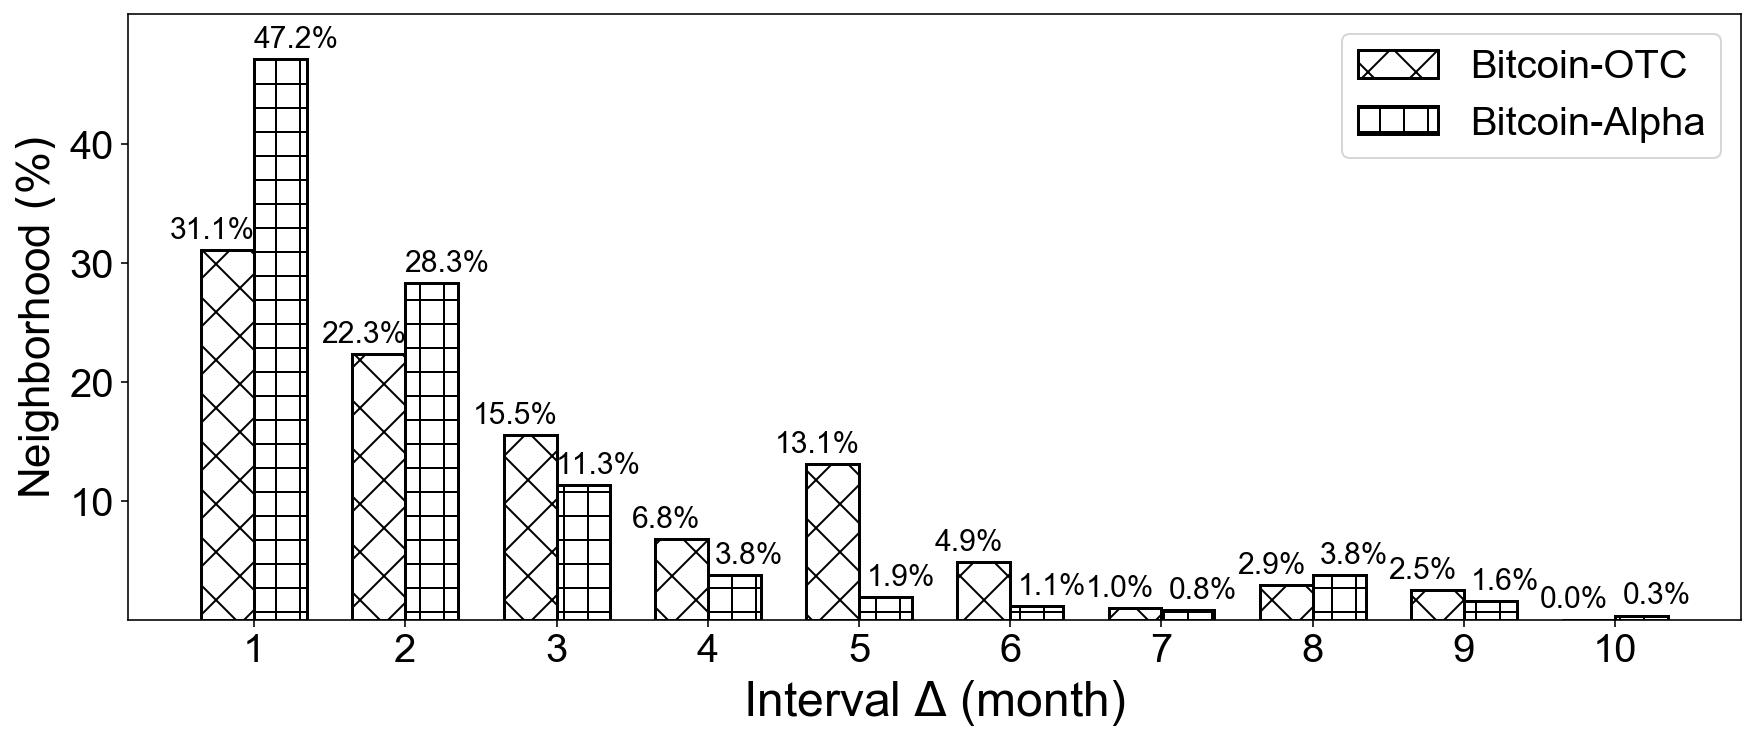

In [2]:
_hp = [ "/" , "\\" , "|" , "-" , "+" , "x", "o", "O", ".", "*" ]
width = 0.35  # the width of the bars
fig, ax = plt.subplots(figsize=(12, 5))

precents1 = [0.3106796116504854, 0.22330097087378642, 0.1553398058252427, 0.06796116504854369, 0.13074092951, 
             0.04854368932038835, 0.009708737864077669, 0.02912621359223301, 0.0245988763113245, 0.0]
precents2 = [0.4716981132075472, 0.2830188679245283, 0.11320754716981132, 0.03773584905660377, 0.018867924528301886,
             0.01104413975, 0.0078237847722354, 0.03773584905660377, 0.01557272994, 0.0032951945824613]
x = np.arange(1, 11)
y1, y2 = np.array(precents1), np.array(precents2)
labels1 = [f'{p*100:.1f}%' for p in precents1]
labels2 = [f'{p*100:.1f}%' for p in precents2]

bar1 = ax.bar(x - width/2, y1, width, 
              color='w', edgecolor='black', hatch=_hp[5], linewidth=1.5,
              label='Bitcoin-OTC')
bar2 = ax.bar(x + width/2, y2, width, 
              color='w', edgecolor='black', hatch=_hp[4], linewidth=1.5,
              label='Bitcoin-Alpha')

def autolabel(rects, labels, _x_offset):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for i, rect in enumerate(rects):
        height = rect.get_height()
        ax.annotate(labels[i],
                    xy=(rect.get_x() + rect.get_width() / 2 + _x_offset, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=15)

autolabel(bar1, labels1, -0.1)
autolabel(bar2, labels2, 0.1)

ax.xaxis.set_ticks(list(range(1, 11, 1)))
ax.set_ylim(0, 0.51)
ax.yaxis.set_ticks([0.1, 0.2, 0.3, 0.4])
ax.set_yticklabels(['10','20', '30', '40',])
ax.yaxis.set_tick_params(labelsize=20)
ax.xaxis.set_tick_params(labelsize=20)

ax.set_xlabel(r'Interval $\Delta$ (month)', fontsize=24)
ax.set_ylabel(r'Neighborhood $(\%)$', fontsize=22)
ax.legend(fontsize=20)

fig.tight_layout(pad=0, h_pad=0, w_pad=0)
fig.savefig(os.path.join('.', 'motivation-new.png'), bbox_inches='tight', dpi=200)